3. Programming Task (Basic GAN Implementation)

Implement a simple GAN using PyTorch or TensorFlow to generate handwritten digits from the MNIST dataset.

Requirements:

•	Generator and Discriminator architecture

•	Training loop with alternating updates

•	Show sample images at Epoch 0, 50, and 100

Deliverables:

•	Generated image samples

•	Screenshot or plots comparing losses of generator and discriminator over time


100%|██████████| 9.91M/9.91M [00:00<00:00, 22.4MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 760kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 6.29MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.55MB/s]


Epoch [1/100] Loss D: 0.4434, Loss G: 1.6870


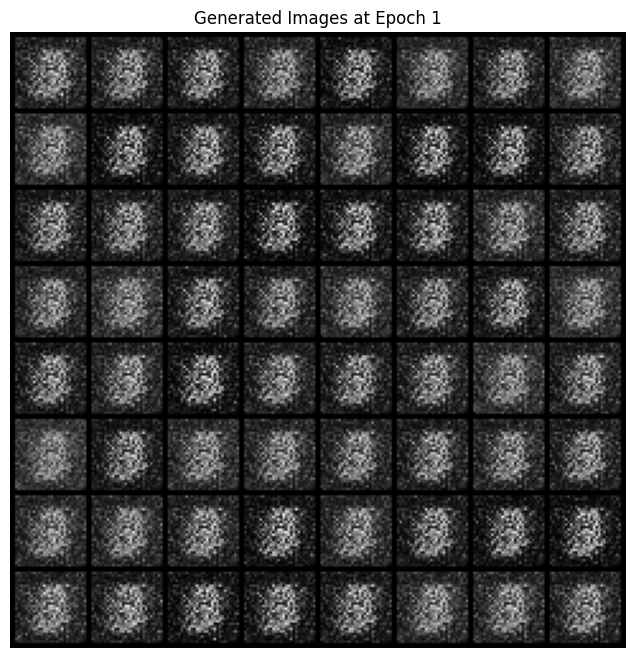

Epoch [2/100] Loss D: 1.0129, Loss G: 1.1385
Epoch [3/100] Loss D: 0.5598, Loss G: 1.5951
Epoch [4/100] Loss D: 0.7212, Loss G: 1.3801
Epoch [5/100] Loss D: 0.9754, Loss G: 1.2954
Epoch [6/100] Loss D: 0.8092, Loss G: 1.5996
Epoch [7/100] Loss D: 1.3447, Loss G: 0.8751
Epoch [8/100] Loss D: 0.7829, Loss G: 1.4787
Epoch [9/100] Loss D: 1.3745, Loss G: 0.7985
Epoch [10/100] Loss D: 1.0611, Loss G: 1.1362
Epoch [11/100] Loss D: 0.7915, Loss G: 1.6491
Epoch [12/100] Loss D: 1.4831, Loss G: 0.7638
Epoch [13/100] Loss D: 0.9303, Loss G: 1.2773
Epoch [14/100] Loss D: 0.8081, Loss G: 1.4057
Epoch [15/100] Loss D: 0.6258, Loss G: 2.3410
Epoch [16/100] Loss D: 0.8615, Loss G: 1.3676
Epoch [17/100] Loss D: 0.7866, Loss G: 1.8643
Epoch [18/100] Loss D: 0.9392, Loss G: 1.2670
Epoch [19/100] Loss D: 0.8426, Loss G: 1.3510
Epoch [20/100] Loss D: 1.4285, Loss G: 1.0681
Epoch [21/100] Loss D: 1.0050, Loss G: 1.2241
Epoch [22/100] Loss D: 1.0128, Loss G: 1.3309
Epoch [23/100] Loss D: 1.0229, Loss G: 1.7

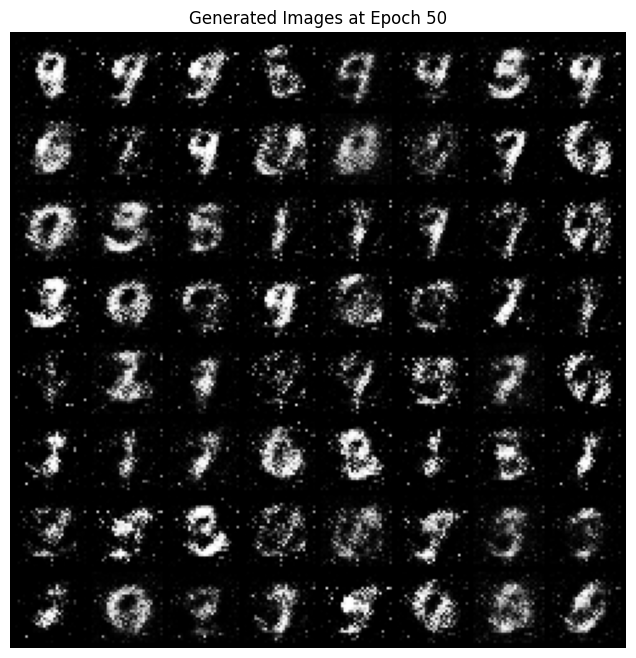

Epoch [51/100] Loss D: 0.6156, Loss G: 2.8593
Epoch [52/100] Loss D: 0.7695, Loss G: 1.9350
Epoch [53/100] Loss D: 0.9353, Loss G: 1.6388
Epoch [54/100] Loss D: 0.9198, Loss G: 1.1521
Epoch [55/100] Loss D: 0.9863, Loss G: 2.2032
Epoch [56/100] Loss D: 1.3720, Loss G: 2.1754
Epoch [57/100] Loss D: 0.8975, Loss G: 1.5502
Epoch [58/100] Loss D: 0.5687, Loss G: 2.4936
Epoch [59/100] Loss D: 0.8863, Loss G: 1.9026
Epoch [60/100] Loss D: 0.3880, Loss G: 3.4400
Epoch [61/100] Loss D: 0.8841, Loss G: 2.0926
Epoch [62/100] Loss D: 1.1345, Loss G: 1.5676
Epoch [63/100] Loss D: 1.2709, Loss G: 2.7933
Epoch [64/100] Loss D: 1.0058, Loss G: 1.9929
Epoch [65/100] Loss D: 1.0191, Loss G: 1.6803
Epoch [66/100] Loss D: 1.0938, Loss G: 1.8306
Epoch [67/100] Loss D: 0.5624, Loss G: 2.3863
Epoch [68/100] Loss D: 0.5427, Loss G: 2.6756
Epoch [69/100] Loss D: 0.7536, Loss G: 2.4832
Epoch [70/100] Loss D: 1.1577, Loss G: 1.7314
Epoch [71/100] Loss D: 1.4947, Loss G: 1.4679
Epoch [72/100] Loss D: 1.7437, Los

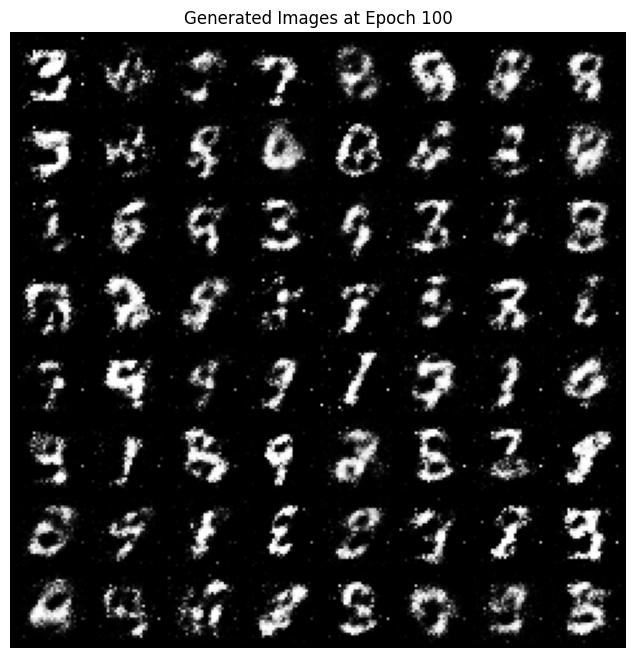

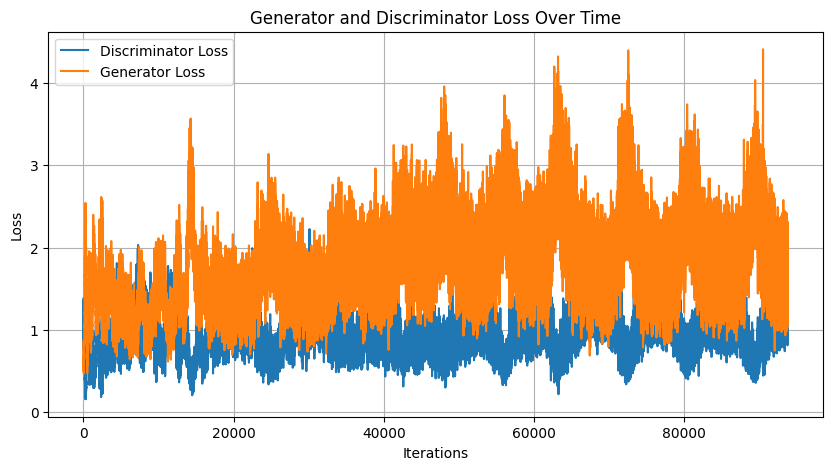

In [1]:
# Part 1: Import Libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torchvision.utils as vutils
import matplotlib.pyplot as plt

# Part 2: Hyperparameters
batch_size = 64
lr = 0.0002
z_dim = 100
epochs = 100
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Part 3: Data Loader
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

dataloader = DataLoader(
    datasets.MNIST('.', download=True, transform=transform),
    batch_size=batch_size, shuffle=True
)

# Part 4: Generator Network
class Generator(nn.Module):
    def __init__(self, z_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(z_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 784),
            nn.Tanh()  # Outputs between -1 and 1
        )

    def forward(self, z):
        return self.model(z).view(-1, 1, 28, 28)

# Part 5: Discriminator Network
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(784, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# Part 6: Initialize Networks
G = Generator(z_dim).to(device)
D = Discriminator().to(device)

# Optimizers and Loss
criterion = nn.BCELoss()
opt_G = optim.Adam(G.parameters(), lr=lr)
opt_D = optim.Adam(D.parameters(), lr=lr)

# Part 7: Logging and Sample Visualization
losses_D = []
losses_G = []

def show_generated_images(G, z_dim, device, epoch):
    G.eval()
    with torch.no_grad():
        z = torch.randn(64, z_dim).to(device)
        fake_imgs = G(z).detach().cpu()
        grid = vutils.make_grid(fake_imgs, nrow=8, normalize=True)
        plt.figure(figsize=(8, 8))
        plt.axis("off")
        plt.title(f"Generated Images at Epoch {epoch}")
        plt.imshow(grid.permute(1, 2, 0))
        plt.show()
    G.train()

# Part 8: Training Loop
for epoch in range(epochs):
    for real_imgs, _ in dataloader:
        real_imgs = real_imgs.to(device)
        batch_size = real_imgs.size(0)

        # Labels
        real_labels = torch.ones(batch_size, 1).to(device)
        fake_labels = torch.zeros(batch_size, 1).to(device)

        # --- Train Discriminator ---
        z = torch.randn(batch_size, z_dim).to(device)
        fake_imgs = G(z)

        D_real = D(real_imgs)
        D_fake = D(fake_imgs.detach())

        loss_D = criterion(D_real, real_labels) + criterion(D_fake, fake_labels)

        opt_D.zero_grad()
        loss_D.backward()
        opt_D.step()

        # --- Train Generator ---
        z = torch.randn(batch_size, z_dim).to(device)
        fake_imgs = G(z)
        D_fake = D(fake_imgs)

        loss_G = criterion(D_fake, real_labels)

        opt_G.zero_grad()
        loss_G.backward()
        opt_G.step()

        losses_D.append(loss_D.item())
        losses_G.append(loss_G.item())

    # Print and show sample images at selected epochs
    print(f"Epoch [{epoch+1}/{epochs}] Loss D: {loss_D.item():.4f}, Loss G: {loss_G.item():.4f}")
    if epoch in [0, 49, 99]:  # Epochs 1, 50, 100 (0-indexed)
        show_generated_images(G, z_dim, device, epoch+1)

# Part 9: Plot Losses
plt.figure(figsize=(10, 5))
plt.plot(losses_D, label='Discriminator Loss')
plt.plot(losses_G, label='Generator Loss')
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Generator and Discriminator Loss Over Time")
plt.legend()
plt.grid(True)
plt.show()